# 前処理

In [523]:

import re


In [638]:
import codecs
import pandas as pd

train= pd.read_csv('train+.csv', sep=',',engine='c')

test=pd.read_csv('test+.csv', sep=',',engine='c')

train=train.drop(['Unnamed: 0'],axis=1)
test=test.drop(['Unnamed: 0'],axis=1)


In [639]:
len(train)

31470

In [640]:
#型
print('train '+'-'*50)
print(train.dtypes)
print('test '+'-'*50)
print(test.dtypes)

train --------------------------------------------------
id          int64
賃料          int64
所在地        object
アクセス       object
間取り        object
築年数        object
方角         object
面積         object
所在階        object
バス・トイレ     object
キッチン       object
放送・通信      object
室内設備       object
駐車場        object
周辺環境       object
建物構造       object
契約期間       object
lat       float64
lng       float64
dtype: object
test --------------------------------------------------
id          int64
所在地        object
アクセス       object
間取り        object
築年数        object
方角         object
面積         object
所在階        object
バス・トイレ     object
キッチン       object
放送・通信      object
室内設備       object
駐車場        object
周辺環境       object
建物構造       object
契約期間       object
lat       float64
lng       float64
dtype: object


In [641]:
print('train '+'-'*50)
print(train.isnull().sum())
print('test '+'-'*50)
print(test.isnull().sum())

train --------------------------------------------------
id           0
賃料           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2749
面積           0
所在階          0
バス・トイレ     329
キッチン       621
放送・通信     3440
室内設備        82
駐車場       5287
周辺環境      9432
建物構造         0
契約期間      7120
lat          0
lng          0
dtype: int64
test --------------------------------------------------
id           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2808
面積           0
所在階          1
バス・トイレ     320
キッチン       635
放送・通信     3454
室内設備        73
駐車場       5356
周辺環境      9241
建物構造         0
契約期間      6981
lat          0
lng          0
dtype: int64


In [642]:
train_tmp = train.copy()
test_tmp = test.copy()
# train_tmp = train_tmp.drop("賃料", axis=1)
df = pd.concat([train_tmp, test_tmp])
df=df.reset_index(drop=True)
df=df.rename(columns={'所在地':'address','アクセス':'access','間取り':'space','面積':'width','放送・通信':'information','築年数':'years','方角':'direction', '所在階':'bfloor','バス・トイレ':'bath','キッチン':'kitchen','室内設備':'service','駐車場':'parking','周辺環境':'enviroment','建物構造':'architect','契約期間':'period','lat':'lat','lng':'lng'})
df



,id,lat,lng,access,kitchen,bath,enviroment,period,service,architect,address,bfloor,information,direction,years,賃料,space,width,parking
0,1,35.748456,139.728800,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,RC（鉄筋コンクリート）,東京都北区滝野川３丁目,1階／12階建,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,南東,9年9ヶ月,75000.0,1K,20.01m2,駐輪場\t空有
1,2,35.662885,139.778627,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,ガスコンロ／\tシステムキッチン\t／\t給湯,専用トイレ／\tシャワー／\t温水洗浄便座,【スーパー】 1283m,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,鉄骨造,東京都中央区月島３丁目,5階／10階建,インターネット対応,NaN,44年10ヶ月,76000.0,1R,16.5m2,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2,3,35.675153,139.666255,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,2年間,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,RC（鉄筋コンクリート）,東京都渋谷区笹塚２丁目,12階／15階建,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,南,8年6ヶ月,110000.0,1K,22.05m2,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m"
3,4,35.700170,139.648465,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,ガスコンロ／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,2年間\t※この物件は\t定期借家\tです。,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,RC（鉄筋コンクリート）,東京都杉並区高円寺南２丁目23-2,3階／4階建,インターネット対応／\t光ファイバー,南,29年4ヶ月,150000.0,2LDK,60.48m2,駐車場\t無\t駐輪場\t無\tバイク置き場\t無
4,5,35.766431,139.872321,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,給湯／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,2年間,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,木造,東京都葛飾区金町３丁目7-2,1階／2階建,NaN,南,31年7ヶ月,74000.0,2DK,39.66m2,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無"
5,6,35.733822,139.795246,常磐線快速\t南千住駅\t徒歩2分\t\t都電荒川線\t三ノ輪橋駅\t徒歩10分\t\t日比...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,【スーパー】 251m\t【コンビニ】 376m,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,RC（鉄筋コンクリート）,東京都荒川区南千住５丁目,6階／12階建,インターネット対応／\t光ファイバー,東,7年6ヶ月,160000.0,2LDK,50.8m2,"駐輪場\t空有\t駐車場\t近隣\t27,000円(税込)\t距離150m\tバイク置き場\t無"
6,7,35.752992,139.587849,西武池袋線\t大泉学園駅\t徒歩4分\t\t西武池袋線\t保谷駅\t徒歩25分\t\t東武東...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,【スーパー】 812m\t【コンビニ】 149m\t【コンビニ】 942m\t【スーパー】 ...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,RC（鉄筋コンクリート）,東京都練馬区東大泉３丁目,6階／8階建,インターネット対応／\t光ファイバー／\tCATV／\tBSアンテナ,南,10年5ヶ月,78500.0,1K,23.82m2,"駐輪場\t空有\t駐車場\t近隣\t16,000円(税込)\t距離200m\tバイク置き場\t無"
7,8,35.625996,139.686671,東急東横線\t学芸大学駅\t徒歩7分\t\t東急東横線\t都立大学駅\t徒歩16分\t\t東...,ガスコンロ／\tコンロ2口／\tシステムキッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,【スーパー】 334m\t【スーパー】 562m\t【スーパー】 694m\t【コンビニ】 ...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,RC（鉄筋コンクリート）,東京都目黒区鷹番１丁目,1階／6階建,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,NaN,14年4ヶ月,115000.0,1K,32.32m2,NaN
8,9,35.719499,139.755944,南北線\t東大前駅\t徒歩3分\t\t都営三田線\t白山(東京都)駅\t徒歩10分\t\t千...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t洗面台独立,NaN,2年間,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,SRC（鉄骨鉄筋コンクリート）,東京都文京区向丘１丁目,4階／9階建,NaN,北西,44年8ヶ月,184327.0,2DK,65.59m2,駐車場\t無
9,10,35.751231,139.718584,埼京線\t板橋駅\t徒歩8分\t\t都営三田線\t新板橋駅\t徒歩4分\t\t東武東上線\t...,ガスコンロ／\tコンロ2口／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,NaN,2年間,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,鉄骨造,東京都板橋区板橋４丁目,2階／3階建,光ファイバー／\tCATV,南東,38年9ヶ月,76000.0,1DK,30.3m2,駐車場\t無


In [529]:

import numpy as np
import MeCab
from sklearn.feature_extraction.text import CountVectorizer

# MeCab による単語への分割関数 (名詞のみ残す)
def split_text_only_noun(text):
    tagger = MeCab.Tagger()

    words = []
    for c in tagger.parse(text).splitlines()[:-1]:
        surface, feature = c.split('\t')
        pos = feature.split(',')[0]
        if pos == '名詞':
            words.append(surface)
    return ' '.join(words)



In [530]:
# messages_list=df.access.map(split_text_only_noun)
# docs = np.array(messages_list)
# count = CountVectorizer()
# bags = count.fit_transform(docs)

# print(bags.toarray())
# # [[1 1 1 0]
# #  [0 1 1 1]]

# features = count.get_feature_names()
# print(features)

# count = CountVectorizer()
# bags = count.fit_transform(docs)

# print(bags.toarray())
# # [[1 1 1 0]
# #  [0 1 1 1]]

# features = count.get_feature_names()
# print(features)

In [531]:
# import numpy as np

# from sklearn.feature_extraction.text import TfidfTransformer

# # tf-idf
# tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
# np.set_printoptions(precision=2)
# tf_idf = tfidf.fit_transform(bags)

# print(len(tf_idf.toarray())
      

In [532]:
def filter_dis(x):
    return np.sqrt((x.lat-35.681236)**2.0+(x.lng-139.767125)**2.0)

dis=(df.lat-35.681236)**2+(df.lng-139.767125)**2.0

In [533]:
def filter_sysk(x):
    try:
        if "システムキッチン" in x :
            return 1
        else:
            return 0
    except TypeError:
        return 0

sysk=df.kitchen.map(filter_sysk)

In [534]:
def filter_conv(x):
    try :
        if "コンビニ" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
conv=df.enviroment.map(filter_conv)

In [535]:
def filter_surper(x):
    try :
        if "スーパー" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
sur=df.enviroment.map(filter_surper)

In [536]:
df.enviroment.isnull().sum()

18673

In [537]:
re.findall('[0-9]+', df.kitchen.unique()[0])[0]
# df.kitchen.unique()[0]
def filter_konro(x):
    try :
        return int(re.findall('[0-9]+', x[0])[0])
    except IndexError:
        return 2
    except TypeError:
        return 2
konro=df.kitchen.map(filter_konro)

In [538]:
def filter_uni(x):
    try :
        if "大学" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
uni=df.enviroment.map(filter_uni)

In [539]:
def filter_env0(x):
    try :
        return re.split("【|】",x)
    except AttributeError:
        return None
    except TypeError:
        return None
    
env=df.enviroment.map(filter_env0)


def filter_env1(x):
    try:
        return int(x[2].replace("m\t",""))
    except IndexError:
        return None
    except TypeError:
        return None
    except ValueError:
        return None
env=env.map(filter_env1)

In [540]:
env

0        495.0
1          NaN
2         89.0
3        225.0
4        193.0
5        251.0
6        812.0
7        334.0
8          NaN
9          NaN
10       406.0
11         NaN
12         NaN
13         NaN
14       612.0
15       318.0
16       122.0
17       523.0
18       228.0
19       237.0
20       179.0
21       673.0
22         NaN
23       425.0
24         NaN
25       373.0
26       308.0
27       800.0
28       131.0
29       555.0
         ...  
62702      NaN
62703    370.0
62704    763.0
62705    713.0
62706    750.0
62707    352.0
62708      NaN
62709    167.0
62710     51.0
62711    270.0
62712      NaN
62713    286.0
62714    120.0
62715    619.0
62716    440.0
62717    140.0
62718      NaN
62719     50.0
62720    104.0
62721    460.0
62722      NaN
62723      NaN
62724    283.0
62725      NaN
62726    523.0
62727    204.0
62728      NaN
62729      NaN
62730      NaN
62731      NaN
Name: enviroment, Length: 62732, dtype: float64

In [541]:
df.access

0        都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1        都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2        京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3        総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...
4        京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...
5        常磐線快速\t南千住駅\t徒歩2分\t\t都電荒川線\t三ノ輪橋駅\t徒歩10分\t\t日比...
6        西武池袋線\t大泉学園駅\t徒歩4分\t\t西武池袋線\t保谷駅\t徒歩25分\t\t東武東...
7        東急東横線\t学芸大学駅\t徒歩7分\t\t東急東横線\t都立大学駅\t徒歩16分\t\t東...
8        南北線\t東大前駅\t徒歩3分\t\t都営三田線\t白山(東京都)駅\t徒歩10分\t\t千...
9        埼京線\t板橋駅\t徒歩8分\t\t都営三田線\t新板橋駅\t徒歩4分\t\t東武東上線\t...
10       都営浅草線\t西馬込駅\t徒歩4分\t\t都営浅草線\t馬込駅\t徒歩16分\t\t東急池上...
11                  京成本線\t京成小岩駅\t徒歩15分\t\t京成本線\t江戸川駅\t徒歩7分
12       銀座線\t表参道駅\t徒歩11分\t\t千代田線\t表参道駅\t徒歩11分\t\t山手線渋谷...
13       中央線（快速）\t阿佐ケ谷駅\t徒歩8分\t\t丸ノ内線(池袋－荻窪)\t南阿佐ケ谷駅\t徒歩4分
14       総武線・中央線（各停）\t錦糸町駅\t徒歩10分\t\t都営大江戸線\t両国(都営線)駅\t...
15       京王新線\t幡ケ谷駅\t徒歩8分\t\t京王線\t笹塚駅\t徒歩12分\t\t丸ノ内線(中野...
16       東武東上線\t上板橋駅\t徒歩7分\t\t副都心線\t氷川台駅\t徒歩21分\t\t東武東上.

In [542]:
def filter_yama(x):
    try :
        if "山手線" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
yama=df.access.map(filter_yama)
    
    

In [543]:
def filter_balcony(x):
    try :
        if "バルコニー" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
bal=df.service.map(filter_balcony)
    
    

In [544]:
def filter_citygas(x):
    try :
        if "都市ガス" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
    

citygas=df.service.map(filter_citygas)

In [545]:
def filter_period(x):
    try :
        if "定期借家" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
    

rp=df.period.map(filter_period)

In [546]:
def filter_elevator(x):
    try :
        if "エレベーター" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
    

el=df.service.map(filter_period)

In [547]:
# train[train.賃料>1000000]

In [548]:
#アクセス時間の前処理
access=df.access.str.split("\t\t",expand=True)
# access.isnull().sum()
# access[0]

In [549]:
access.columns=['access0','access1','access2','access3']
access

,access0,access1,access2,access3
0,都営三田線\t西巣鴨駅\t徒歩4分,埼京線\t板橋駅\t徒歩14分,都電荒川線\t西ケ原四丁目駅\t徒歩7分,None
1,都営大江戸線\t勝どき駅\t徒歩5分,有楽町線\t月島駅\t徒歩9分,日比谷線\t築地駅\t徒歩20分,None
2,京王線\t笹塚駅\t徒歩6分,京王線\t代田橋駅\t徒歩7分,京王線\t明大前駅\t徒歩17分,None
3,総武線・中央線（各停）\t高円寺駅\t徒歩9分,丸ノ内線(池袋－荻窪)\t新高円寺駅\t徒歩3分,丸ノ内線(池袋－荻窪)\t東高円寺駅\t徒歩14分,None
4,京成金町線\t京成金町駅\t徒歩5分,常磐線\t金町(東京都)駅\t徒歩7分,京成金町線\t柴又駅\t徒歩17分,None
5,常磐線快速\t南千住駅\t徒歩2分,都電荒川線\t三ノ輪橋駅\t徒歩10分,日比谷線\t三ノ輪駅\t徒歩10分,None
6,西武池袋線\t大泉学園駅\t徒歩4分,西武池袋線\t保谷駅\t徒歩25分,東武東上線\t和光市駅\t/バス(23分)大泉学園駅北口下車徒歩1分,None
7,東急東横線\t学芸大学駅\t徒歩7分,東急東横線\t都立大学駅\t徒歩16分,東急東横線\t祐天寺駅\t徒歩20分,None
8,南北線\t東大前駅\t徒歩3分,都営三田線\t白山(東京都)駅\t徒歩10分,千代田線\t根津駅\t徒歩12分,None
9,埼京線\t板橋駅\t徒歩8分,都営三田線\t新板橋駅\t徒歩4分,東武東上線\t下板橋駅\t徒歩7分,None


In [550]:
def filter_eki(x):
    try :
        return x.split("\t")[1]
    except AttributeError:
        return " "
    except IndexError:
        return " "
def stationdelete(x):
    try:
        return x.replace("駅"," ")
    except AttributeError:
        return " "
kari0=access.applymap(filter_eki).access0
kari1=access.applymap(filter_eki).access1
kari2=access.applymap(filter_eki).access2
kari3=access.applymap(filter_eki).access3
kari=(kari0+kari1+kari2+kari3).map(stationdelete)

docs = np.array(kari)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

ekifeatures = count.get_feature_names()
# print(features)

nearstation=pd.DataFrame(bags.toarray(),columns=ekifeatures)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [551]:
def srashdelete(x):
    try:
        return x.replace('／','')
    except AttributeError:
        return " "
se=df.service.map(srashdelete)
def filter_se(x):
    try :
        j=''
        for i in x:
            j+=i+' '
        return j
    except AttributeError:
        return " "
    except IndexError:
        return " "
se=se.str.split("\t").map(filter_se)

docs = np.array(se)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

sefeatures = count.get_feature_names()
# print(features)

se=pd.DataFrame(bags.toarray(),columns=sefeatures)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [552]:
linenum=df.access.map(lambda x:x.count("線"))
linenum.isnull().sum()

0

In [553]:

def filter_tk(x):
    try:
        return int(x.count("\t"))
    except IndexError:
        return 4
    except TypeError:
        return 4
    except AttributeError:
        return 4
kn=df.kitchen.map(filter_tk)

In [554]:

def filter_tb(x):
    try:
        return int(x.count("\t"))
    except IndexError:
        return 6
    except TypeError:
        return 6
    except AttributeError:
        return 6
bn=df.bath.map(filter_tb)

In [555]:
def filter_ts(x):
    try:
        return int(x.count("\t"))
    except IndexError:
        return 9
    except TypeError:
        return 9
    except AttributeError:
        return 9
sn=df.service.map(filter_ts)

In [556]:
station=access.access0.map(lambda x:x.split("\t")[1])
# station.unique()

In [557]:
access=access.applymap(lambda x:x.split("歩") if x is not None else None)
def filter_func1(x):
    try:
        return int(x[1].replace("分",""))
    except IndexError:
        return None
    except TypeError:
        return None
    except ValueError:
        return None
access=access.applymap(filter_func1)

In [558]:
accessmiss=access[access.access0.isnull()].index
# df.access


In [559]:
access.access0.ix[accessmiss]=[15,1,15,15,7,9,10,11,8,10,13,8,8]


In [560]:
access.isnull().sum()

access0        0
access1     3030
access2     6701
access3    62255
dtype: int64

In [561]:
# del access["access3"]

access=access.fillna(method='ffill',axis='columns')
access=access.fillna(method='bfill',axis='columns')

access.isnull().sum()

access0    0
access1    0
access2    0
access3    0
dtype: int64

In [562]:
df[df.index==9845]
access[access.index==9845]=1

In [563]:
df[df.index==56577]
access[access.index==56577]=13

In [564]:
#住所の前処理
address=df.address


In [565]:
address=address.map(lambda x :x.replace("東京都",""))

In [566]:
address1=address.map(lambda x:x.split("区")[0])

In [567]:
address2=address.map(lambda x:x.split("区")[1])

In [568]:
#前処理
import re    
address2=address2.map(lambda x:re.split("１|２|３|４|５|６|７|８|９|1|2|3|4|5|6|7|8|9|一丁目|二丁目|三丁目|四丁目|五丁目|六丁目|七丁目|八丁目",x)[0] )

In [569]:
#築年数の前処理
years=df.years
years.map(lambda x:str(x.split("年")[0]))
def filter_func2(x):
    kari=x.split("年")[0]
    if kari=="新築":
        return 0
    else :
        return int(kari)
years=years.map(filter_func2)

In [570]:
space=df.space


In [571]:
#間取りの前処理
import re
df["room"]=0
df["R"]=0
df["L"]=0
df["DK"]=0
df["LDK"]=0
df["D"]=0
df["K"]=0
df["S"]=0
df.room=df.space.apply(lambda x: int(re.split("L|D|K|S|R",x)[0]))
df.R=df.space.apply(lambda x: 1 if "R" in x else 0)
df.L=df.space.apply(lambda x: 1 if "L" in x else 0)
df.DK=df.space.apply(lambda x: 1 if "DK" in x else 0)
df.LDK=df.space.apply(lambda x: 1 if "LDK" in x else 0)
df.D=df.space.apply(lambda x: 1 if "D" in x else 0)
df.K=df.space.apply(lambda x: 1 if "K" in x else 0)
df.S=df.space.apply(lambda x: 1 if "S" in x else 0)

room=df.space.apply(lambda x: re.split("L|D|K|S|R",x)[0])
R=df.space.apply(lambda x: 1 if "R" in x else 0)
L=df.space.apply(lambda x: 1 if "L" in x else 0)
DK=df.space.apply(lambda x: 1 if "DK" in x else 0)
LDK=df.space.apply(lambda x: 1 if "LDK" in x else 0)
D=df.space.apply(lambda x: 1 if "D" in x else 0)
K=df.space.apply(lambda x: 1 if "K" in x else 0)
S=df.space.apply(lambda x: 1 if "S" in x else 0)
room=room.apply(lambda x:int(x))

In [572]:
bfloor=df.bfloor
# access=df.access.str.split("\t\t",expand=True)
# bfloor=bfloor.map(lambda x:x.split("／") if type(x) is str else "3階")
# for i in bfloor:
#     if "／" not in i:
#         print(i)
    

In [573]:
import numpy as np
bfloor1=bfloor.map(lambda x: x.split("／")[0] if type(x) is str else "2階")
def floor_func(x):
    try :
        return x.split("／")[1]
    except IndexError:
        return x.split("／")[0]
    except AttributeError:
        return "2階"
bfloor2=bfloor.map(floor_func)
# for i in bfloor:
#     if "地下"  in i:
#         print(i)

bfloor1=bfloor1.map(lambda x:x.replace("地下","-"))
bfloor2=bfloor2.map(lambda x:x.replace("地下","-"))

bfloor1=bfloor1.map(lambda x:x.split("階")[0])
bfloor2=bfloor2.map(lambda x:x.split("階")[0])



In [574]:
# bfloor1
# j=0
# for i in bfloor1:

#     if i=="":
#         print(j)
#     j+=1

In [575]:
bfloor = pd.concat([bfloor1, bfloor2], axis=1)

In [576]:
bfloor.columns=["bfloor","height"]

In [577]:
#前処理
bfloor.bfloor[bfloor.bfloor==""]=None
bfloor=bfloor.fillna(method='ffill',axis='columns')
bfloor=bfloor.fillna(method='bfill',axis='columns')

In [578]:
bfloor=bfloor.applymap(lambda x:int(x))
bfloor1=bfloor.bfloor
bfloor2=bfloor.height
bfloor3=bfloor2-bfloor1

In [579]:
# bfloor

In [580]:
#面積の前処理
width=df.width

In [581]:
width=width.map(lambda x:float(x.replace("m2","")))


In [582]:
#前処理
# width

In [583]:
architect=df.architect

In [584]:
# architect.unique()

In [585]:
#前処理
architect=architect.map(lambda x: 0 if "木造" in x else 1)


In [586]:
direction=df.direction

In [587]:
direction=direction.fillna(method='ffill')

In [588]:
#前処理
direction=direction.map(lambda x:1if "南" in x else 0)

In [589]:
bath=df.bath.str.split("／\t",expand=True)

In [590]:
bath.columns=["bath0","bath1","bath2","bath3","bath4","bath5","bath6","bath7","bath8"]

In [591]:
# bath.bath0.unique()

In [592]:
# bath.bath1.unique()

In [593]:
# bath.bath2.unique()

In [594]:
# bath.bath3.unique()

In [595]:
bath=df.bath

In [596]:
def filter_toilet(x):
    try :
        if '共同トイレ' in x :
            return 1
        else:
            return 0
    except TypeError:
        return 0

sharetoilet=bath.map(filter_toilet)

In [597]:
#前処理
# sharetoilet


In [598]:
yearscount=np.floor((years)%10)

In [599]:
def filter_bath(x):
    try :
        if 'バス・トイレ別' in x :
            return 1
        else:
            return 0
    except TypeError:
        return 1
separatebath=bath.map(filter_bath)

In [600]:
#前処理
# separatebath

In [601]:
kitchen=df.kitchen.str.split("／\t",expand=True)

In [602]:
# kitchen

In [603]:
kitchen.columns=["kitchen0","kitchen1","kitchen2","kitchen3","kitchen4","kitchen5","kitchen6","kitchen"]

In [604]:
def filter_ih(x):
    try :
        if 'IHコンロ' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理
ih=df.kitchen.map(filter_ih)
# ih

In [605]:
def filter_gas(x):
    try :
        if 'ガス' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理
gas=df.kitchen.map(filter_gas)

In [606]:
# df.service.str.split("／\t",expand=True)

In [607]:
# df['室内設備'].unique()
def filter_ms(x):
    try:
        if x.count("階")==2:
            return 1
        else:
            return 0
    except AttributeError:
        return 1
#前処理
ms=df.bfloor.map(filter_ms)
# ms

室内洗濯機置場
バルコニー
フローリング
エアコン付

In [608]:
def filter_wm(x):
    try :
        if '室内洗濯機置場' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理
wm=df.service.map(filter_wm)

In [609]:
def filter_pa(x):
    try:
        if '空有' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理

pa=df.parking.map(filter_pa)
# df.parking.head()
# pa

In [610]:
# pa.head()

In [611]:
#前処理
new=df.years.map(lambda x :1if x=="新築" else 0)

In [612]:
one=bfloor1.map(lambda x:1 if x==1 else 0)
# one
#前処理

In [613]:
def filter_air(x):
    try :
        if 'エアコン' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理
air=df.service.map(filter_air)

In [614]:
def filter_flooring(x):
    try :
        if 'フローリング' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理
flooring=df.service.map(filter_flooring)

In [615]:
def filter_loft(x):
    try :
        if 'ロフト' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理
loft=df.service.map(filter_loft)

In [616]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(address1.unique())
# address1.unique()
area=pd.Series(le.transform(address1) )

In [617]:
minato=address1.map(lambda x: 1if x=="港" else 0)
sibuya=address1.map(lambda x: 1if x=="渋谷" else 0)

In [618]:
nullcol=df.isnull().any(axis=1).map(lambda x:1 if x==True else 0)


In [619]:
def srashdelete(x):
    try:
        return x.replace('／','')
    except AttributeError:
        return " "
ba=df.bath.map(srashdelete)
def filter_ba(x):
    try :
        j=''
        for i in x:
            j+=i+' '
        return j
    except AttributeError:
        return " "
    except IndexError:
        return " "
ba=ba.str.split("\t").map(filter_ba)

docs = np.array(ba)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

bafeatures = count.get_feature_names()
# print(features)

ba=pd.DataFrame(bags.toarray(),columns=bafeatures)

[[1 0 1 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 1 ... 1 1 0]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 0]]


In [644]:
def srashdelete(x):
    try:
        return x.replace('／','')
    except AttributeError:
        return " "
ki=df.kitchen.map(srashdelete)
def filter_ki(x):
    try :
        j=''
        for i in x:
            j+=i+' '
        return j
    except AttributeError:
        return " "
    except IndexError:
        return " "
ki=ki.str.split("\t").map(filter_ki)

docs = np.array(ki)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

kifeatures = count.get_feature_names()
# print(features)

ki=pd.DataFrame(bags.toarray(),columns=kifeatures)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


In [621]:
lat=df.lat
lng=df.lng
bid=df.id
# access
# address1
# years
# room
# L
# D
# K
# S
# bfloor1
# bfloor2
# width
# architect
# direction
# sharetoilet
# separatebath
# ih
# gas
# wm
# pa
# ms
# # address=pd.get_dummies(address1)
# pa

In [99]:
# df_tofile=pd.concat([df.id,access.access0,address1,years,room,L,D,K,S,bfloor1,bfloor2,width,architect,direction,sharetoilet,separatebath,ih,gas,wm,pa,ms], axis=1)
# df_tofile=pd.merge(df_tofile, train[["id","賃料"]], how='outer', on='id')
# df_tofile.columns=["id","access","address","years","room","L","D","K","S","bfloor","height","width","architect","direction","sharetoilet","separatebath","ih","gas","wm","pa","ms","value"]
# # df_tofile=df_tofile.drop(["L","D","ih"],axis=1)
# df_tofile=df_tofile.drop("id",axis=1)

In [100]:
# df_tofile=pd.concat([bid,access.access0,address1,years,lat,lng,room,L,D,K,S,bfloor1,bfloor2,width,architect,direction,ih,gas,wm,pa,ms,one,air,rp,flooring,linenum,bal,env], axis=1)
# # df_tofile=pd.merge(df_tofile, train[["id","賃料"]], how='outer', on='id')
# df_tofile.columns=["id","access0","address1","years","lat","lng","room","L","D","K","S","bfloor","height","width","architect","direction","ih","gas","wm","pa","ms","one","air","rp","flooring","linenum","bal","env"]
# # df_tofile=df_tofile.drop(["L","D","ih"],axis=1)
# # df_tofile=df_tofile.drop("id",axis=1)
# # df_tofile=df_tofile.drop(df_tofile.index[30539])
# df_tofile=df_tofile.drop(df_tofile.index[20926])
# df_tofile=df_tofile.drop(df_tofile.index[20427])
# df_tofile=df_tofile.drop(df_tofile.index[20231])
# df_tofile=df_tofile.drop(df_tofile.index[5775])
# # df_tofile=df_tofile.drop(df_tofile.index[5093])
# envX = df_tofile.dropna().drop("env",axis=1)
# envX = pd.get_dummies(envX)

# #　目的変数に家賃単価を代入する
# envy = df_tofile.dropna().env

# from sklearn.ensemble import RandomForestRegressor as RFR
 
# envtX, envvX,envty, envvy = train_test_split(envX,envy,test_size=0.2)
# rgenv = RFR(n_jobs=-1, random_state=2525)
 
# rgenv.fit(envtX,envty)

In [101]:
# env=pd.Series(rgenv.predict(pd.get_dummies(df_tofile.drop("env",axis=1))))
# list(nearstation.columns)

In [652]:
# df_tofile=pd.concat([bid,access.access0,address1,years,lat,lng,room,L,D,S,bfloor1,bfloor2,bfloor3,width,architect,direction,ih,wm,pa,air,rp,flooring,bal,loft,sn,sharetoilet,separatebath,nearstation,se], axis=1)
# df_tofile=pd.merge(df_tofile, train[["id","賃料"]], how='outer', on='id')
# df_tofile.columns=["id","access","address","years","lat","lng","room","L","D","S","bfloor","height","floordif","width","architect","direction","ih","wm","pa","air","rp","flooring","bal","loft","sn","sharetoilet","separatebath"]+list(nearstation.columns)+list(se.columns)+["value"]

df_tofile=pd.concat([bid,access.access0,years,lat,lng,room,L,D,S,bfloor1,bfloor2,bfloor3,width,architect,direction,wm,pa,air,rp,flooring,bal,loft,sn,ki], axis=1)
df_tofile=pd.merge(df_tofile, train[["id","賃料"]], how='outer', on='id')
df_tofile.columns=["id","access","years","lat","lng","room","L","D","S","bfloor","height","floordif","width","architect","direction","wm","pa","air","rp","flooring","bal","loft","sn",]+list(ki.columns)+["value"]


# df_tofile=df_tofile.drop(["L","D","ih"],axis=1)
df_tofile=df_tofile.drop("id",axis=1)
# df_tofile=df_tofile.drop(df_tofile.index[30539])
df_tofile=df_tofile.drop(df_tofile.index[20926])
df_tofile=df_tofile.drop(df_tofile.index[20427])
df_tofile=df_tofile.drop(df_tofile.index[20231])
df_tofile=df_tofile.drop(df_tofile.index[7491])
df_tofile=df_tofile.drop(df_tofile.index[5775])
# df_tofile=df_tofile.drop(df_tofile.index[5093])
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [653]:
df_tofile.value=np.log(df_tofile.value)
df_tofile.width=np.log(df_tofile.width)

In [647]:
# df_tofile.to_csv('alldata.csv', sep = '\t',encoding='utf-16')
# df_tofile[df_tofile.years>100].index

# データ分析

In [648]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [626]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/ogatatakuya/.matplotlib/matplotlibrc'

In [627]:
import matplotlib as mpl
mpl.get_configdir()

'/Users/ogatatakuya/.matplotlib'

In [628]:
import matplotlib as mpl
mpl.font_manager._rebuild() 

In [629]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

# plt.figure(figsize=(20, 10))

In [630]:
df=df_tofile

In [631]:
df.address.value_counts().plot(kind="bar",color="blue")

AttributeError: 'DataFrame' object has no attribute 'address'

In [632]:
sns.boxplot(x="address", y="value", data=df);


ValueError: Could not interpret input 'address'

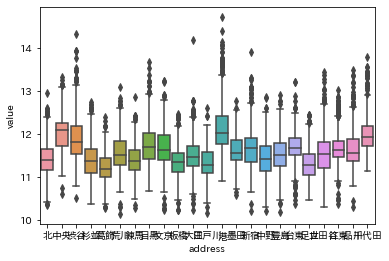

In [320]:
sns.boxplot(x="address", y="value", data=df[df.value<400000]);

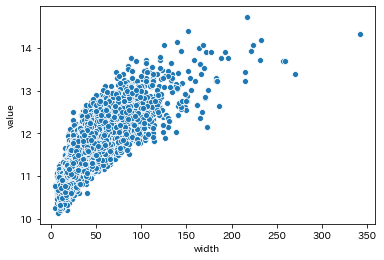

In [321]:
sns.scatterplot(x="width", y="value", data=df.dropna());

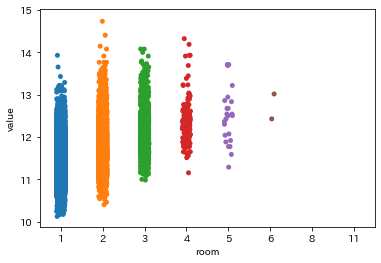

In [322]:

# df[(df.width<10)&(df.value>100000)]

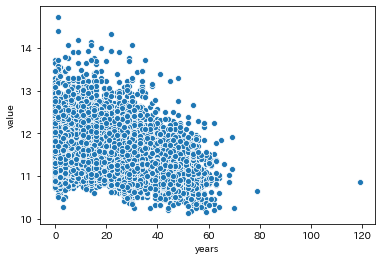

In [323]:
sns.scatterplot(x="years",y="value",data=df)

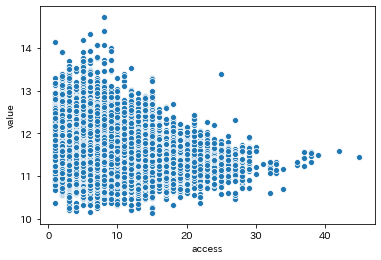

In [324]:
sns.scatterplot(x="access",y="value",data=df)

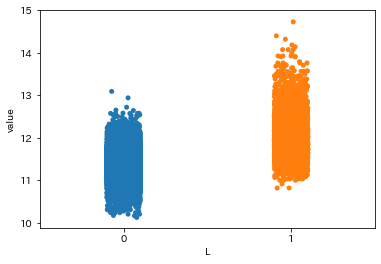

In [325]:
sns.stripplot(x="L",y="value",data=df)

In [326]:
# sns.stripplot(x="linenum",y="value",data=df)

In [327]:
# sns.scatterplot(x="env",y="value",data=df)

In [328]:
df[df.years==0]

,access,address,years,lat,lng,room,L,D,S,bfloor,...,排水その他,敷地内ごみ置き場,水道その他,汲み取り,洗濯機置場なし,浄化槽,石油暖房,都市ガス,防音室,value
12,11.0,港,0,35.660739,139.716030,1,1,1,0,6,...,0,0,0,0,0,0,0,0,0,12.206073
34,5.0,新宿,0,35.681268,139.714288,1,0,0,0,4,...,0,1,0,0,0,0,0,1,0,11.835009
37,22.0,荒川,0,35.733432,139.791410,1,1,1,1,8,...,0,1,0,0,0,0,0,1,0,12.061047
38,1.0,豊島,0,35.727690,139.682842,2,1,1,0,4,...,0,0,0,0,0,0,0,0,0,12.095141
41,6.0,墨田,0,35.705402,139.802058,1,0,0,0,3,...,0,1,0,0,0,0,0,1,0,11.674194
46,7.0,墨田,0,35.715185,139.824597,1,0,0,0,2,...,0,0,0,0,0,0,0,1,0,11.477298
56,3.0,中央,0,35.672830,139.774793,1,0,0,0,11,...,0,1,0,0,0,0,0,1,0,11.856515
67,11.0,北,0,35.758343,139.743243,1,0,0,0,3,...,0,1,0,0,0,0,0,1,0,11.407565
68,11.0,港,0,35.660739,139.716030,1,1,1,0,5,...,0,1,0,0,0,0,0,1,0,12.287653
69,5.0,豊島,0,35.734305,139.724969,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,11.127263


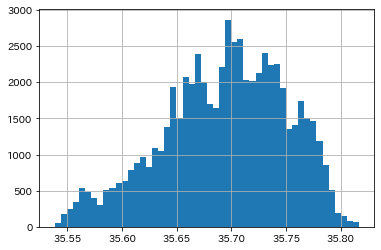

In [329]:
df.lat.hist(bins=50)

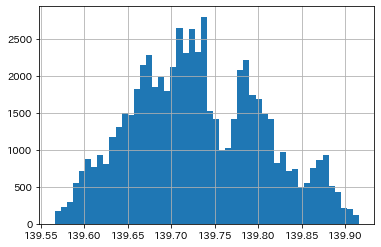

In [330]:
df.lng.hist(bins=50)

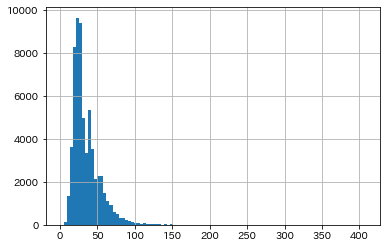

In [331]:
df.width.hist(bins=100)

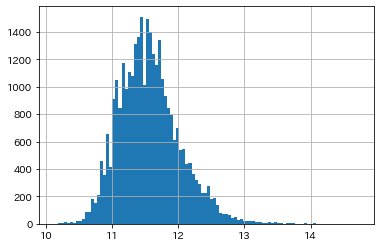

In [332]:
df.value.hist(bins=100)

In [273]:
# df.plot(kind='scatter', x='lat', y='lng', c=df.value,cmap="tab20" ,s=0.1)

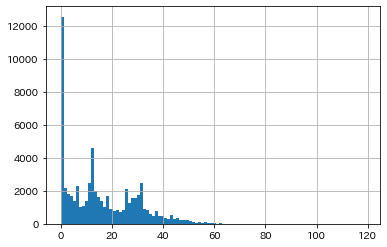

In [274]:
df.years.hist(bins=100)



# 機械学習

In [654]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV



X = df_tofile.dropna().drop("value",axis=1)
test=df_tofile[df_tofile.isnull().any(axis=1)]

X = pd.get_dummies(X)

#　目的変数に家賃単価を代入する
y = df_tofile.dropna().value
train_X, test_X,train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=43)

# from sklearn.preprocessing import MinMaxScaler
# mmsc = MinMaxScaler()
# # 訓練用のデータを正規化する
# train_X_norm = mmsc.fit_transform(train_X)
# # 訓練用データを基準にテストデータも正規化
# test_X_norm = mmsc.transform(test_X)

# 重回帰分析

In [655]:
#重回帰分析
import sklearn
from sklearn.linear_model import LinearRegression as LR

model=LR()

model.fit(train_X, train_y)

linearpred=model.predict(test_X)

In [656]:
model.score(test_X,test_y)

0.8613921752179344

In [381]:
# model=LR()

# model.fit(train_X_norm, train_y)

# linearpred=model.predict(test_X_norm)
# model.score(test_X_norm,test_y)

In [382]:
# predcheck=pd.concat([test_X,(model.predict(test_X)-test_y)],axis=1)
# predcheck[abs(predcheck.value)>100000]


In [338]:
# for i in train_tmp.index:
#     if i.index in list(predcheck[abs(predcheck.value)>100000].index) :
#         print(train_tmp[])
# predcheck2=pd.concat([test_tmp,test_y],axis=1)
# predcheck2.ix[list(predcheck[abs(predcheck.value)>100000].index), :]

# import pandas as pd
# train = pd.read_csv('train.csv', delimiter=',',engine='python')
# test = pd.read_csv('test.csv',delimiter=',', engine='python')

# train_tmp = train.copy()
# test_tmp = test.copy()
# # train_tmp = train_tmp.drop("賃料", axis=1)
# df = pd.concat([train_tmp, test_tmp])
# df=df.reset_index(drop=True)
# df=df.drop(df_tofile.index[20926])
# df=df.drop(df_tofile.index[20427])
# df=df.drop(df_tofile.index[20231])
# df=df.drop(df_tofile.index[5775])
# len(df)

# df = pd.concat([train_tmp, test_tmp])
# df=df.reset_index(drop=True)
# len(df)
# df.ix[list(predcheck[abs(predcheck.value)>100000].index)]
# df


In [339]:
# # calc
# import scipy.stats as st
# import scipy
# data=scipy.stats.zscore(test_y-linearpred)
# n=len(data)
# m=n+1
# ii=np.arange(n)+1 # i=1~n

# qo=np.sort(data)
# qp=st.norm.ppf( ii/m )



# # plot
# plt.plot([-3,3],[-3,3])
# plt.plot(qo,qp,'r*')
# plt.xlabel('Observed Quartile')
# plt.ylabel('Predicted Quartile')
# plt.savefig('qqplot.png',dpi=300)

In [659]:
import pandas as pd
from statsmodels import api as sm
import statsmodels.formula.api as smf

# 何かしらのデータ


# get_dummies()で質的データも対応可能
# x = pd.get_dummies(df[['説明変数1', '説明変数2', '説明変数3']]) # ←もちろん増減可能 
# y = df['目的変数']

# 定数項(y切片)を必要とする線形回帰のモデル式ならば必須
statsX = sm.add_constant(X)

# 最小二乗法によるモデリング
model = sm.OLS(y,statsX)
result = model.fit()

# 重回帰分析の結果を表示
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     5386.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:52:17   Log-Likelihood:                 10852.
No. Observations:               31465   AIC:                        -2.163e+04
Df Residuals:                   31428   BIC:                        -2.132e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.0607      1.910     53.971      0.000      99.318     106.804
access        -0.0101      0.000    -44.838      0.000      -0.011      -0.010
years         -0.0073   9.33e-05    -78.092      0.000      -0.007      -0.007
lat           -1.2205      0.018    -67.291      0.000      -1.256      -1.185
lng           -0.3589      0.014    -26.226      0.000      -0.386      -0.332
room          -0.0054      0.003     -2.149      0.032      -0.010      -0.000
L              0.0690      0.004     18.014      0.000       0.062       0.077
D             -0.0011      0.004     -0.323      0.747      -0.008       0.006
S              0.0204      0.007      2.801      0.005       0.006       0.035
bfloor         0.0083      0.000     39.073      0.000       0.008       0.009
height         0.0082      0.000     67.499      0.000       0.008       0.008
floordif   -1.659e-05      0.000     -0.083      0.934      -0.000       0.000
width          0.6323      0.005    124.988      0.000       0.622       0.642
architect      0.0892      0.003     29.445      0.000       0.083       0.095
direction     -0.0066      0.002     -3.295      0.001      -0.010      -0.003
wm            -0.0117      0.003     -3.528      0.000      -0.018      -0.005
pa            -0.0237      0.002    -10.637      0.000      -0.028      -0.019
air            0.0177      0.004      3.953      0.000       0.009       0.026
rp             0.0762      0.004     17.040      0.000       0.067       0.085
flooring      -0.0037      0.003     -1.153      0.249      -0.010       0.003
bal           -0.0332      0.003    -11.697      0.000      -0.039      -0.028
loft           0.0757      0.006     13.715      0.000       0.065       0.087
sn             0.0083      0.000     20.728      0.000       0.008       0.009
ihコンロ          0.0227      0.004      5.893      0.000       0.015       0.030
l字キッチン         0.0829      0.010      8.269      0.000       0.063       0.102
カウンターキッチン     -0.0177      0.004     -5.038      0.000      -0.025      -0.011
ガスコンロ          0.0207      0.003      6.409      0.000       0.014       0.027
コンロ1口         -0.0002      0.004     -0.038      0.970      -0.008       0.008
コンロ2口         -0.0149      0.003     -4.671      0.000      -0.021      -0.009
コンロ3口          0.0216      0.004      4.977      0.000       0.013       0.030
コンロ4口以上        0.2400      0.024      9.816      0.000       0.192       0.288
コンロ設置可        -0.0263      0.005     -5.022      0.000      -0.037      -0.016
システムキッチン       0.0549      0.003     19.586      0.000       0.049       0.060
冷蔵庫あり          0.0368      0.007      5.289      0.000       0.023       0.050
口数不明          -0.0018      0.009     -0.190      0.850      -0.020       0.017
独立キッチン         0.0064      0.003      2.000      0.046       0.000       0.013
給湯

In [357]:
dropcolumns=list(result.pvalues[result.pvalues >0.05].index)
X=statsX.drop(columns=dropcolumns)

train_X, test_X,train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=43)

# ランダムフォレストで学習

In [657]:
from sklearn.ensemble import RandomForestRegressor as RFR
 

rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_X,train_y)
print(rg.score(test_X,test_y))
from sklearn.metrics import mean_squared_error
print("randomforest :"+str(np.sqrt(mean_squared_error(np.exp(test_y),np.exp(rg.predict(test_X))))) )

0.9517069789074001
randomforest :16955.059859020213


In [119]:
# X.ix[[20926]].drop([ 'address_世田谷', 'address_中央', 'address_中野',
#        'address_北', 'address_千代田', 'address_台東', 'address_品川', 'address_墨田',
#        'address_大田', 'address_文京', 'address_新宿', 'address_杉並', 'address_板橋',
#        'address_江戸川', 'address_江東', 'address_渋谷', 'address_港', 'address_目黒',
#        'address_練馬', 'address_荒川', 'address_葛飾', 'address_豊島', 'address_足立' ],axis=1)

In [120]:
# df.ix[[20926]]

In [345]:


predcheck=pd.concat([test_X,(rg.predict(test_X)-test_y)],axis=1)
misslist=list(predcheck[abs(predcheck.value)>200000].index)
df.ix[list(predcheck[abs(predcheck.value)>200000].index)].head()

,access,address,years,lat,lng,room,L,D,S,bfloor,...,排水その他,敷地内ごみ置き場,水道その他,汲み取り,洗濯機置場なし,浄化槽,石油暖房,都市ガス,防音室,value


In [346]:
# rg.predict(test_X.ix[misslist])
# オリジナルは11万円
# X.ix[misslist]
# misslist
# rg.predict(X.ix[[20926]])

In [347]:
# rg.predict(test_X[test_X.index==9564] )

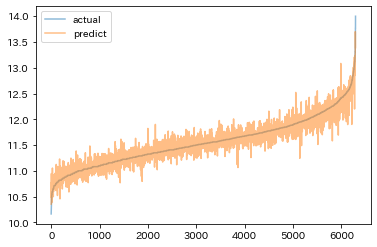

In [399]:

checktesty=test_y.sort_values()
checktestX=test_X.ix[list(checktesty.index)]
checktesty=checktesty.reset_index(drop=True)#これと

checkpred=pd.DataFrame(rg.predict(checktestX))#これ
# checktesty.plot()
# checkpred.plot()
check=pd.concat([checktesty,checkpred], axis=1)
check.columns=["actual","predict"]
# checktesty
check.plot(alpha=0.5)

In [658]:
fti = rg.feature_importances_

print('Feature Importances:')
for i,feat in enumerate(test_X.columns):
    print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	access     : 0.007246
	years      : 0.057129
	lat        : 0.072837
	lng        : 0.053665
	room       : 0.001595
	L          : 0.415165
	D          : 0.000643
	S          : 0.000235
	bfloor     : 0.003611
	height     : 0.092034
	floordif   : 0.002607
	width      : 0.266690
	architect  : 0.004362
	direction  : 0.000762
	wm         : 0.000849
	pa         : 0.000686
	air        : 0.000888
	rp         : 0.001032
	flooring   : 0.000658
	bal        : 0.000713
	loft       : 0.000306
	sn         : 0.004143
	ihコンロ      : 0.000807
	l字キッチン     : 0.000112
	カウンターキッチン  : 0.000439
	ガスコンロ      : 0.000773
	コンロ1口      : 0.000299
	コンロ2口      : 0.000830
	コンロ3口      : 0.000560
	コンロ4口以上    : 0.000056
	コンロ設置可     : 0.000258
	システムキッチン   : 0.006589
	冷蔵庫あり      : 0.000170
	口数不明       : 0.000082
	独立キッチン     : 0.000387
	給湯         : 0.000682
	電気コンロ      : 0.000103


In [520]:
col_names = test_X.columns.values
col_names_ = col_names[np.argsort(rg.feature_importances_)[::-1]]

In [521]:
col_names_

array(['L', 'width', 'height', 'lat', 'lng', 'years', '洗面台独立', 'access',
       'architect', 'sn', 'bfloor', 'floordif', '脱衣所', '浴室乾燥機', 'room',
       '温水洗浄便座', 'ih', 'シャワー', 'rp', '追焚機能', 'wm', 'direction', 'bal',
       'pa', 'D', 'air', 'flooring', '専用トイレ', 'バス', '専用バス', 'トイレ別',
       'loft', 'S', '共同トイレ', 'バスなし', '共同バス', 'トイレなし'], dtype=object)

In [359]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rg, X, y)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np

import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.94643629 0.94393824 0.94344426]
Average score: 0.9446062647410286


# グリッドサーチ

In [128]:
# # 必要なライブラリのインポート

# # 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
# params = {'n_estimators'  : [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}

In [129]:
# # モデルにインスタンス生成
# rg = RFR(n_jobs=-1, random_state=2525)
# # ハイパーパラメータ探索
# cv = GridSearchCV(rg, params, cv = 10, scoring= 'neg_mean_squared_error', n_jobs =1)
# cv.fit(train_X, train_y)

# optuna

In [130]:
# import optuna
# from sklearn.ensemble import RandomForestRegressor
 
# def objective(trial):
#     '''
#     trial:set of hyperparameter    
#     '''
#     # hypyer param
#     max_depth = trial.suggest_int('max_depth', 3, 10) # 深すぎると過学習になるかも...
#     n_estimators = trial.suggest_int('n_estimators', 50, 100) # しっかりやるなら100以上
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'auto', 'log2'])
 
#     # model
#     model = RFR(max_depth=max_depth,
#                                   n_estimators=n_estimators,
#                                   max_features=max_features,
#                                   n_jobs=-1,
#                                   verbose=1)
 
#     # fit
#     model.fit(train_X, train_y)
 
#     # eval
#     score = -1 * model.score(test_X,test_y) 
#     return score

In [131]:
# # # %%time
 
# study = optuna.create_study()
 
# # https://optuna.readthedocs.io/en/stable/reference/study.html#optuna.study.Study.optimize
# study.optimize(func=objective, # 実行する関数
#                n_trials=30, # 試行回数
#                timeout=None, # 与えられた秒数後に学習を中止します。default=None
#                n_jobs=-1 # 並列実行するjob数
#               )

In [132]:
# #最適化したハイパーパラメータの確認
# print('check!!!')
# print('best_param:{}'.format(study.best_params))
# print('====================')
 
# #最適化後の目的関数値
# print('best_value:{}'.format(study.best_value))
# print('====================')
 
# #最適な試行
# print('best_trial:{}'.format(study.best_trial))
# print('====================')
 
# # トライアルごとの結果を確認
# for i in study.trials:
#     print('param:{0}, eval_value:{1}'.format(i[5], i[2]))
# print('====================')

# Borutaの実行

In [354]:
# from boruta import BorutaPy
# from sklearn.ensemble import RandomForestRegressor
 
# # model
# rgb = RFR(n_jobs=-1, random_state=2525,max_depth= 10, n_estimators=70, max_features='auto')
 
# # define Boruta feature selection method
# # https://github.com/scikit-learn-contrib/boruta_py/blob/master/boruta/boruta_py.py
# feat_selector = BorutaPy(rg, 
#                          n_estimators='auto',  # 特徴量の数に比例して、木の本数を増やす
#                          verbose=2, # 0: no output,1: displays iteration number,2: which features have been selected already
#                          alpha=0.05, # 有意水準
#                          max_iter=50, # 試行回数
#                          random_state=1
#                         )
 
# # 実行!!
# feat_selector.fit(train_X.as_matrix(),train_y)
# train_X_selected = train_X.iloc[:,feat_selector.support_]
# test_X_selected = test_X.iloc[:,feat_selector.support_]
# print( train_X_selected.columns)
# rgb = RFR(n_jobs=-1, random_state=2525,max_depth= 10, n_estimators=70, max_features='auto')
 
# rgb.fit(train_X_selected,train_y)

# print(rgb.score(test_X_selected,test_y))


In [360]:
from sklearn.model_selection import cross_val_score
X_selected=X.iloc[:,feat_selector.support_]
scores = cross_val_score(rgb, X_selected, y)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np

import numpy as np
print('Average score: {}'.format(np.mean(scores)))

print("randomforest :"+str(np.sqrt(mean_squared_error(test_y,rgb.predict(test_X_selected)))) )

NameError: name 'feat_selector' is not defined

In [361]:
checktesty=test_y.sort_values()
checktestX=test_X_selected.ix[list(checktesty.index)]
checktesty=checktesty.reset_index(drop=True)#これと

checkpred=pd.DataFrame(rgb.predict(checktestX))#これ
# checktesty.plot()
# checkpred.plot()
check=pd.concat([checktesty,checkpred], axis=1)
check.columns=["actual","predict"]
# checktesty
check.plot(alpha=0.5)

NameError: name 'test_X_selected' is not defined

# lightGBM

In [ ]:

# import lightgbm as lgb
# train_data_set = lgb.Dataset(train_X, train_y)
# test_data_set = lgb.Dataset(test_X, test_y, reference=train_data_set)
 
# params = {                                                                                               
#     'boosting_type': 'gbdt',                                                                             
#     'objective': 'regression_l2',                                                                           
#     'metric': 'l2',                                                                             
#     'num_leaves': 40,                                                                                    
#     'learning_rate': 0.05,                                                                               
#     'feature_fraction': 0.9,                                                                             
#     'bagging_fraction': 0.8,                                                                             
#     'bagging_freq': 5,   
#     'lambda_l2': 2,
# }                                                                                                        
                                                                                                         
# gbm = lgb.train(params,                                                                                  
#                 train_data_set,                                                                               
#                 num_boost_round=200,                                                                      
#                 valid_sets=test_data_set,                                                                     
#                 early_stopping_rounds=10
#                 )   

In [ ]:
# y_pred=gbm.predict(test_X,num_iteration=gbm.best_iteration)

In [ ]:
# from sklearn.metrics import r2_score
# r2_score(test_y,y_pred)

# Xgboost

In [405]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import optuna

class RidgeCV():
    model_cls = Ridge

    def __init__(self, n_trials=100):
        self.n_trials = n_trials

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)
        elif isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

        self.X = X
        self.y = y

        study = optuna.create_study(direction='maximize')
        study.optimize(self, n_trials=self.n_trials)
        self.best_trial = study.best_trial

        print()
        print("Best score:", round(self.best_trial.value, 2))
        print("Best params:", self.best_trial.params)
        print()

        self.best_model = self.model_cls(**self.best_trial.params)
        self.best_model.fit(self.X, self.y)

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X.values.reshape(1, -1))
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        return self.best_model.predict(X)

    def score(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)

        return self.best_model.score(X, y)

    def kfold_cv(self, model, splits=5):
        scores = []

        kf = KFold(n_splits=splits, shuffle=True)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))

        score = np.array(scores).mean()
        return score

In [406]:
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

class XGBRegressorCV(RidgeCV):
    model_cls = xgb.XGBRegressor

    def __call__(self, trial):
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
        alpha = trial.suggest_loguniform('alpha', 1e-8, 1.0)

        max_depth = trial.suggest_int('max_depth', 1, 9)
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        grow_policy = trial.suggest_categorical(
            'grow_policy', ['depthwise', 'lossguide'])

        if booster == 'gbtree':
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy)
        elif booster == 'dart':
            sample_type = trial.suggest_categorical('sample_type',
                                                    ['uniform', 'weighted'])
            normalize_type = trial.suggest_categorical('normalize_type',
                                                       ['tree', 'forest'])
            rate_drop = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
            skip_drop = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy,
                                   sample_type=sample_type,
                                   normalize_type=normalize_type,
                                   rate_drop=rate_drop, skip_drop=skip_drop)

        score = self.kfold_cv(model)
        return score

In [407]:
xgbr = XGBRegressorCV(n_trials=20)
xgbr.fit(train_X, train_y)

[I 2019-10-20 20:19:14,874] Finished trial#0 resulted in value: 0.8471973623638516. Current best value is 0.8471973623638516 with parameters: {'booster': 'dart', 'alpha': 8.323532823171756e-08, 'max_depth': 2, 'eta': 0.13954230693526581, 'gamma': 0.42823888510601704, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0006537838461349584, 'skip_drop': 0.0005873341081994564}.


KeyboardInterrupt: 

In [ ]:
print(xgbr.score(test_X,test_y))
print("XGboost :"+str(np.sqrt(mean_squared_error(test_y,xgbr.predict(test_X)))) )

# SVC(非推奨)

In [ ]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# # 学習を行う
# svr = SVR(kernel='rbf')
# svr.fit(train_X, train_y)

# svr.score(test_X,test_y)

In [ ]:
# y_pred=svr.predict(test_X)
# r2_score(test_y,y_pred)

In [300]:
from sklearn.metrics import mean_squared_error
print("randomforest :"+str(np.sqrt(mean_squared_error(test_y,rg.predict(test_X)))) )
# print("randomboruta:"+str(np.sqrt(mean_squared_error(test_y,rg.predict(test_X)))) )
# print("linearpred      :"+str(np.sqrt(mean_squared_error(test_y,model.predict(test_X)))) )
# print("lightgbm        :"+str(np.sqrt(mean_squared_error(test_y,gbm.predict(test_X,num_iteration=gbm.best_iteration)))) )
# print("svm               :"+str(np.sqrt(mean_squared_error(test_y,svr.predict(test_X)))) )

randomforest :0.09998043113879475


In [ ]:
#  df_tofile

In [301]:
X = pd.get_dummies(df_tofile)

In [302]:
subtrain_X=X.dropna().drop("value",axis=1)

subtrain_y=X.dropna().value

subtest_X=X[X.isnull().any(axis=1)].drop("value",axis=1)


In [303]:
len(subtrain_X)

31465

In [304]:
len(subtest_X)

31262

In [305]:
rg = RFR(n_jobs=-1, random_state=2525)
rg.fit(subtrain_X,subtrain_y)
# model = XGBRegressorCV(n_trials=25)
# model.fit(subtrain_X, subtrain_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=2525, verbose=0,
                      warm_start=False)

In [307]:
pred=np.exp(rg.predict(subtest_X))

In [308]:
sub = pd.DataFrame(pd.read_csv("test.csv")['id'])
sub["value"] = list(pred)
sub.to_csv("submission.csv", index = False)


## 特徴量最初
randomforest:24531.698709995504


## loft flooringなし
randomforest:19863.88476957777
    

## loft、flooringあり

randomforest:21857.176455527297


    ["id","access0","address","years","room","L","D","K","S","bfloor","height","width","architect","direction","sharetoilet","separatebath","ih","gas","wm","pa","ms","one","air","value"]+"nullcol"
    
randomforest:27669.215126753577



randomforest:18165.900691870556